In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LinReg_model import PaymentMethodPredictor
from BasicNeuralNet import PaymentMethodNNPredictor
from scipy.stats import pointbiserialr

In [19]:
# Load the order payments dataset from the specified local path
payments_path = 'olist_order_payments_dataset.csv'  # Replace with the actual path to the file
order_payments = pd.read_csv(payments_path)
# Select only numerical columns for the correlation analysis
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,failed_total_payment
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,False
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,True
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,False
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,True
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,False
...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,False
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,False
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,False
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,True


In [20]:
numerical_order_payments = order_payments.select_dtypes(include=['int64', 'float64'])

summary_statistics = numerical_order_payments.describe()

summary_statistics

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


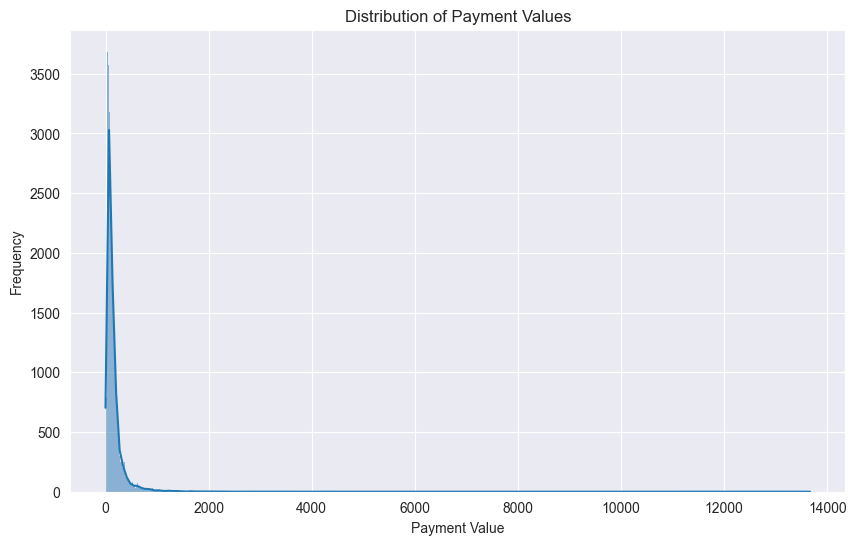

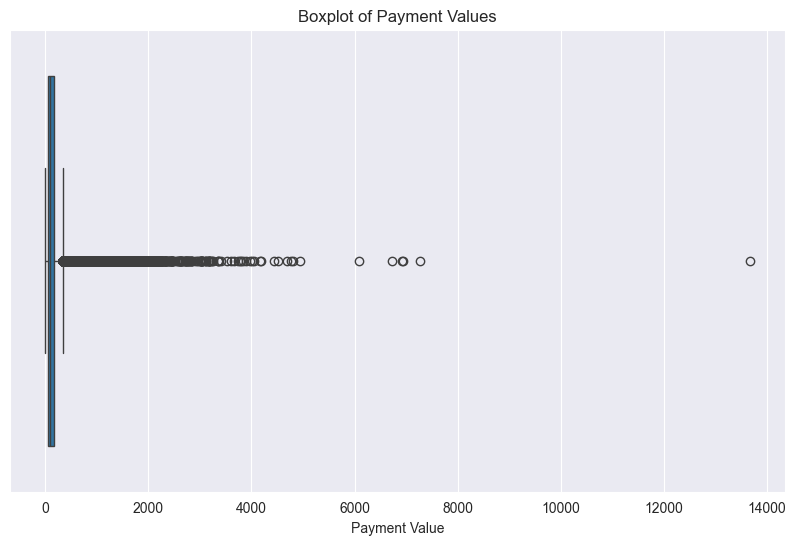

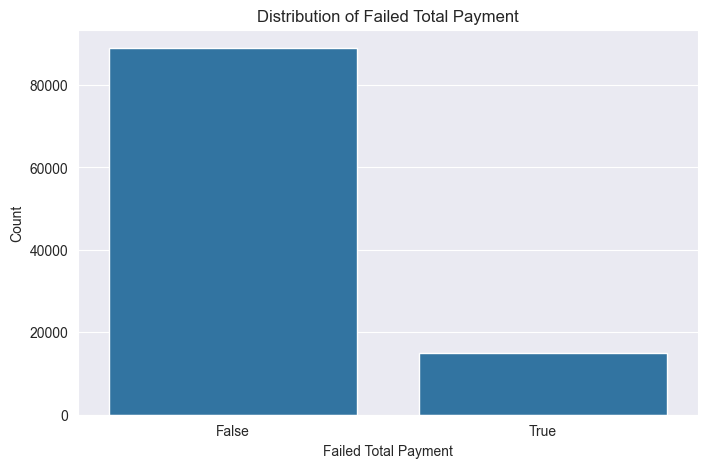

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(order_payments['payment_value'], kde=True)
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot to check for outliers in payment values
plt.figure(figsize=(10, 6))
sns.boxplot(x=order_payments['payment_value'])
plt.title('Boxplot of Payment Values')
plt.xlabel('Payment Value')
plt.show()

failed_payment_distribution = order_payments['failed_total_payment'].value_counts(normalize=True)

# Plot the distribution of the 'failed_total_payment'
plt.figure(figsize=(8, 5))
sns.countplot(x=order_payments['failed_total_payment'])
plt.title('Distribution of Failed Total Payment')
plt.xlabel('Failed Total Payment')
plt.ylabel('Count')
plt.show()



In [27]:

# One-hot encode the 'payment_type' column
payment_type_dummies = pd.get_dummies(order_payments['payment_type'], prefix='payment_type')

# Add the one-hot encoded columns to your DataFrame
order_payments = pd.concat([order_payments, payment_type_dummies], axis=1)

# Select numerical and one-hot encoded columns for the correlation analysis
columns_to_analyze = ['payment_sequential', 'payment_installments', 'payment_value'] + list(payment_type_dummies.columns)

# Initialize a dictionary to hold the correlation results
correlations = {}

# Perform point-biserial correlation between each column and the binary 'failed_total_payment' column
for column in columns_to_analyze:
    correlation, _ = pointbiserialr(order_payments[column], order_payments['failed_total_payment'])
    correlations[column] = correlation

# Convert the results to a DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Failed Payment'])

# Print the correlation results
print(correlation_df)

                          Correlation with Failed Payment
payment_sequential                              -0.032699
payment_installments                             0.376426
payment_value                                    0.120033
payment_type_boleto                             -0.130395
payment_type_credit_card                         0.157586
payment_type_debit_card                         -0.033413
payment_type_not_defined                         0.002907
payment_type_voucher                            -0.061022


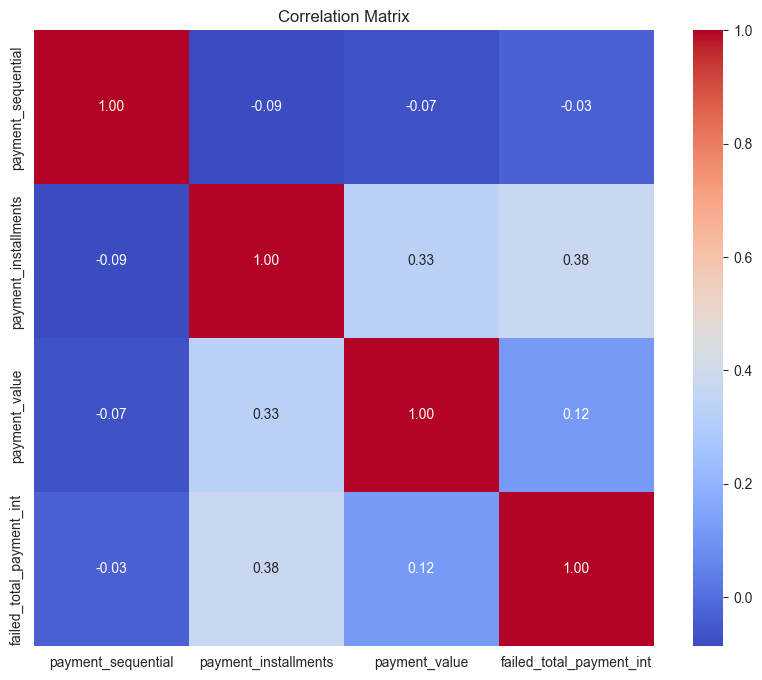

In [29]:
order_payments['failed_total_payment_int'] = order_payments['failed_total_payment'].astype(int)

# Select relevant columns for the correlation matrix
selected_columns = ['payment_sequential', 'payment_installments', 'payment_value', 'failed_total_payment_int']
correlation_data = order_payments[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
'''people that pay in rates and with credit card are apparently most likely to fail'''
'''how can we prevent to sell to people that are likely to fail? '''

In [33]:
# Assume 'failed_total_payment' is a boolean column indicating if the payment failed
# Group by 'payment_installments' and calculate the count of failed payments
failed_payment_by_installment = order_payments.groupby('payment_installments')['failed_total_payment'].sum()

# Alternatively, to get the proportion of failed payments in each installment group
failed_payment_proportion = order_payments.groupby('payment_installments')['failed_total_payment'].mean()

print("\nProportion of Failed Payments by Installment:")
print(failed_payment_proportion)


Proportion of Failed Payments by Installment:
payment_installments
0     0.000000
1     0.051345
2     0.102070
3     0.156582
4     0.199634
5     0.247375
6     0.303571
7     0.365929
8     0.386364
9     0.450311
10    0.496809
11    0.391304
12    0.639098
13    0.562500
14    0.466667
15    0.635135
16    0.800000
17    0.875000
18    0.925926
20    1.000000
21    1.000000
22    1.000000
23    1.000000
24    1.000000
Name: failed_total_payment, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


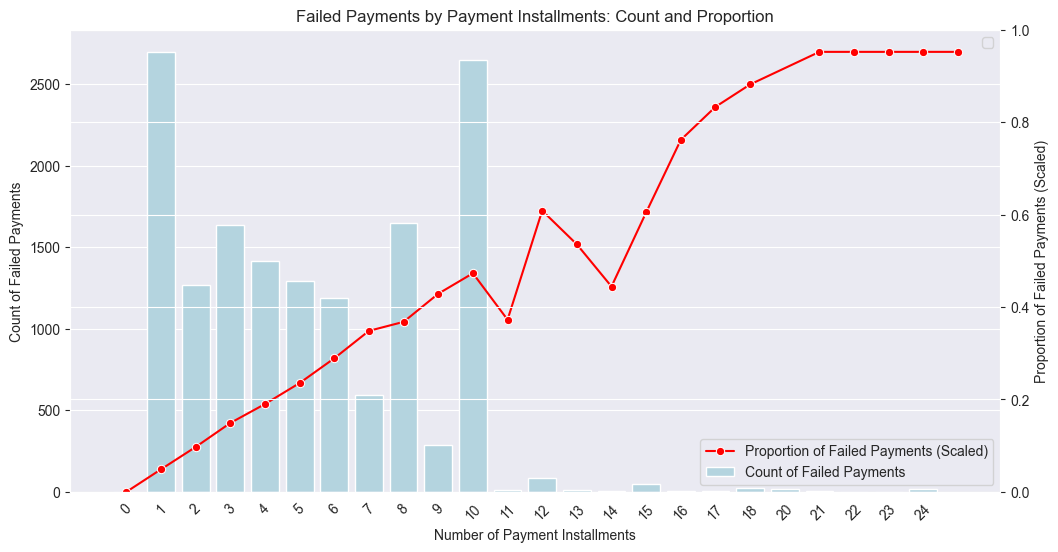

In [34]:
plt.figure(figsize=(12, 6))

# Create a bar plot for the count of failed payments
sns.barplot(x=failed_payment_by_installment.index, y=failed_payment_by_installment.values, color='lightblue', label='Count of Failed Payments')

# Create a line plot for the proportion of failed payments
# We multiply the proportions by a factor (e.g., max count) to scale them appropriately for the secondary y-axis
scale_factor = failed_payment_by_installment.max()
sns.lineplot(x=failed_payment_proportion.index, y=failed_payment_proportion.values * scale_factor, marker='o', color='red', label='Proportion of Failed Payments (Scaled)')

plt.title('Failed Payments by Payment Installments: Count and Proportion')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Failed Payments')
plt.xticks(rotation=45)

# Adding a secondary y-axis for the proportions
plt.twinx().set_ylabel('Proportion of Failed Payments (Scaled)')

plt.legend()
plt.show()

In [4]:
'''Linear Regression model to predict the likelihood of failed payments'''
payments_path = 'olist_order_payments_dataset.csv'  # Replace with the actual path to the file
order_payments = pd.read_csv(payments_path)

#remove the user_id

order_payments = order_payments.drop(['order_id', 'payment_sequential'], axis=1)

# Initialize the PaymentMethodPredictor with the DataFrame and target variable
predictor = PaymentMethodPredictor(order_payments[:50000], 'failed_total_payment')

# Preprocess the data
predictor.preprocess_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = predictor.split_data()

# Train the model
predictor.train_model(X_train, y_train)

# Evaluate the model
accuracy = predictor.evaluate_model(X_test, y_test)
print(f"Final Model accuracy: {accuracy}")

      payment_type  payment_installments  payment_value  failed_total_payment
0      credit_card                     8          99.33                 False
1      credit_card                     1          24.39                  True
2      credit_card                     1          65.71                 False
3      credit_card                     8         107.78                  True
4      credit_card                     2         128.45                 False
...            ...                   ...            ...                   ...
49995  credit_card                     3         149.86                 False
49996  credit_card                     3         159.70                 False
49997  credit_card                     2          22.90                 False
49998  credit_card                     1          71.02                 False
49999       boleto                     1         528.87                  True

[50000 rows x 4 columns]
preprocessing data
Training accuracy: 

In [5]:
'''Neural Network to predict the likelihood of failed payments'''
nn_predictor = PaymentMethodNNPredictor(order_payments[:50000], 'failed_total_payment')

# Preprocess the data
nn_predictor.preprocess_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = nn_predictor.split_data()

# Build the neural network model
nn_predictor.build_model(input_dim=X_train.shape[1], output_dim=y_train.shape[1])

# Train the model
nn_predictor.train_model(X_train, y_train)

# Evaluate the model
nn_predictor.evaluate_model(X_test, y_test)

# To predict the likelihood of failed payments
likelihoods = nn_predictor.model.predict(X_test)[:, 1]

Epoch 1/10
1250/1250 [==============================] - 1s 470us/step - loss: 0.4035 - accuracy: 0.8529
Epoch 2/10
1250/1250 [==============================] - 1s 431us/step - loss: 0.3986 - accuracy: 0.8557
Epoch 3/10
1250/1250 [==============================] - 1s 451us/step - loss: 0.3987 - accuracy: 0.8557
Epoch 4/10
1250/1250 [==============================] - 1s 447us/step - loss: 0.3986 - accuracy: 0.8557
Epoch 5/10
1250/1250 [==============================] - 1s 450us/step - loss: 0.3985 - accuracy: 0.8557
Epoch 6/10
1250/1250 [==============================] - 1s 452us/step - loss: 0.3985 - accuracy: 0.8557
Epoch 7/10
1250/1250 [==============================] - 1s 439us/step - loss: 0.3984 - accuracy: 0.8557
Epoch 8/10
1250/1250 [==============================] - 1s 440us/step - loss: 0.3984 - accuracy: 0.8557
Epoch 9/10
1250/1250 [==============================] - 1s 435us/step - loss: 0.3984 - accuracy: 0.8557
Epoch 10/10
313/313 [==============================] - 0s 334us/